# Traffic Sign Recognizer

## Importing Required Libraries

In [24]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))

1


In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
np.random.seed(369)


## Assigning Path for Dataset

In [26]:
data_dir = './data/'
train_path = './data/Train'


# Resizing the images to 60x60x3
IMG_HEIGHT = 60
IMG_WIDTH = 60
channels = 3

## Finding Total Classes

In [27]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [28]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

In [29]:
# folders = os.listdir(train_path)

# train_number = []   # Number of images in each class
# class_num = []      # clasees values

# for folder in folders:
#     train_files = os.listdir(train_path + '/' + folder)
#     train_number.append(len(train_files))
#     class_num.append(classes[int(folder)])

# # Sorting the dataset on the basis of number of images in each class
# zipped_lists = zip(train_number, class_num)
# sorted_pairs = sorted(zipped_lists)
# tuples = zip(*sorted_pairs)
# train_number, class_num = [list(tuple) for tuple in tuples]

# # Plotting the number of images in each class
# plt.figure(figsize=(21,10))  
# plt.bar(class_num, train_number)
# plt.xticks(class_num, rotation='vertical')
# plt.show()

In [30]:
# # Visualizing 10 random images from test data
# import random
# from matplotlib.image import imread

# test = pd.read_csv(data_dir + '/Test.csv')
# imgs = test["Path"].values

# plt.figure(figsize=(25,10))

# for i in range(1,11):
#     plt.subplot(2,5,i)
#     random_img_path = data_dir + '/' + random.choice(imgs)
#     rand_img = imread(random_img_path)
#     plt.imshow(rand_img)
#     plt.grid(b=None)
#     plt.xlabel(rand_img.shape[1], fontsize = 20)  #width of image
#     plt.ylabel(rand_img.shape[0], fontsize = 20)  #height of image

## Collecting the Training Data

In [31]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 60, 60, 3) (39209,)


## Shuffling the training data

In [32]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

In [33]:
# X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=369, shuffle=True)

# X_train = X_train/255 
# X_val = X_val/255

# print("X_train.shape", X_train.shape)
# print("X_valid.shape", X_val.shape)
# print("y_train.shape", y_train.shape)
# print("y_valid.shape", y_val.shape)

## One hot encoding the labels

In [34]:
X_train = image_data
y_train = tf.keras.utils.to_categorical(image_labels, NUM_CATEGORIES)
# y_val = tf.keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
# print(y_val.shape)

(39209, 43)


## Making the model

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

In [36]:
lr = 0.001
epochs = 15

opt = tf.keras.optimizers.Adam(learning_rate = lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Augmenting the data and training the model

In [37]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.3, 0.7),
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest",
    validation_split=0.2)

# aug.fit(X_train)  # fit and aug.flow
# aug.fit(X_val)


In [38]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32, subset='training'),
            validation_data=datagen.flow(X_train, y_train, batch_size=8, subset='validation'),
            epochs=epochs)


Epoch 1/15
981/981 [==============================] - 76s 76ms/step - loss: 2.1322 - accuracy: 0.4080 - val_loss: 0.7663 - val_accuracy: 0.7460
Epoch 2/15
981/981 [==============================] - 72s 74ms/step - loss: 0.5726 - accuracy: 0.8212 - val_loss: 0.2479 - val_accuracy: 0.9212
Epoch 3/15
981/981 [==============================] - 70s 71ms/step - loss: 0.2842 - accuracy: 0.9128 - val_loss: 0.1311 - val_accuracy: 0.9619
Epoch 4/15
981/981 [==============================] - 71s 72ms/step - loss: 0.1937 - accuracy: 0.9413 - val_loss: 0.1189 - val_accuracy: 0.9619
Epoch 5/15
981/981 [==============================] - 67s 69ms/step - loss: 0.1695 - accuracy: 0.9480 - val_loss: 0.0561 - val_accuracy: 0.9830
Epoch 6/15
981/981 [==============================] - 70s 71ms/step - loss: 0.1394 - accuracy: 0.9578 - val_loss: 0.0874 - val_accuracy: 0.9736
Epoch 7/15
981/981 [==============================] - 78s 80ms/step - loss: 0.1166 - accuracy: 0.9634 - val_loss: 0.0540 - val_accuracy:

## Save Model

In [39]:
model.save('cnn_model.h5')

## Evaluating the model

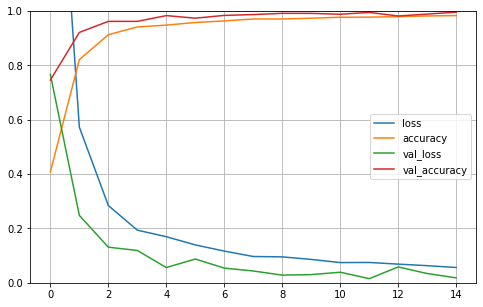

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Loading the test data and running the predictions

In [63]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

# the method for reading images must be identical to the training process (very important)
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255
# aug.fit(X_test)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.3, 0.7),
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

pred = model.predict(datagen.flow(X_test,shuffle=False))   # shuffle=False is important and demanded by the model
# pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
display(pred)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred))

array([16,  1, 38, ..., 38,  7, 10], dtype=int64)

Test Data accuracy:  0.9795724465558194


## Visualizing the confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

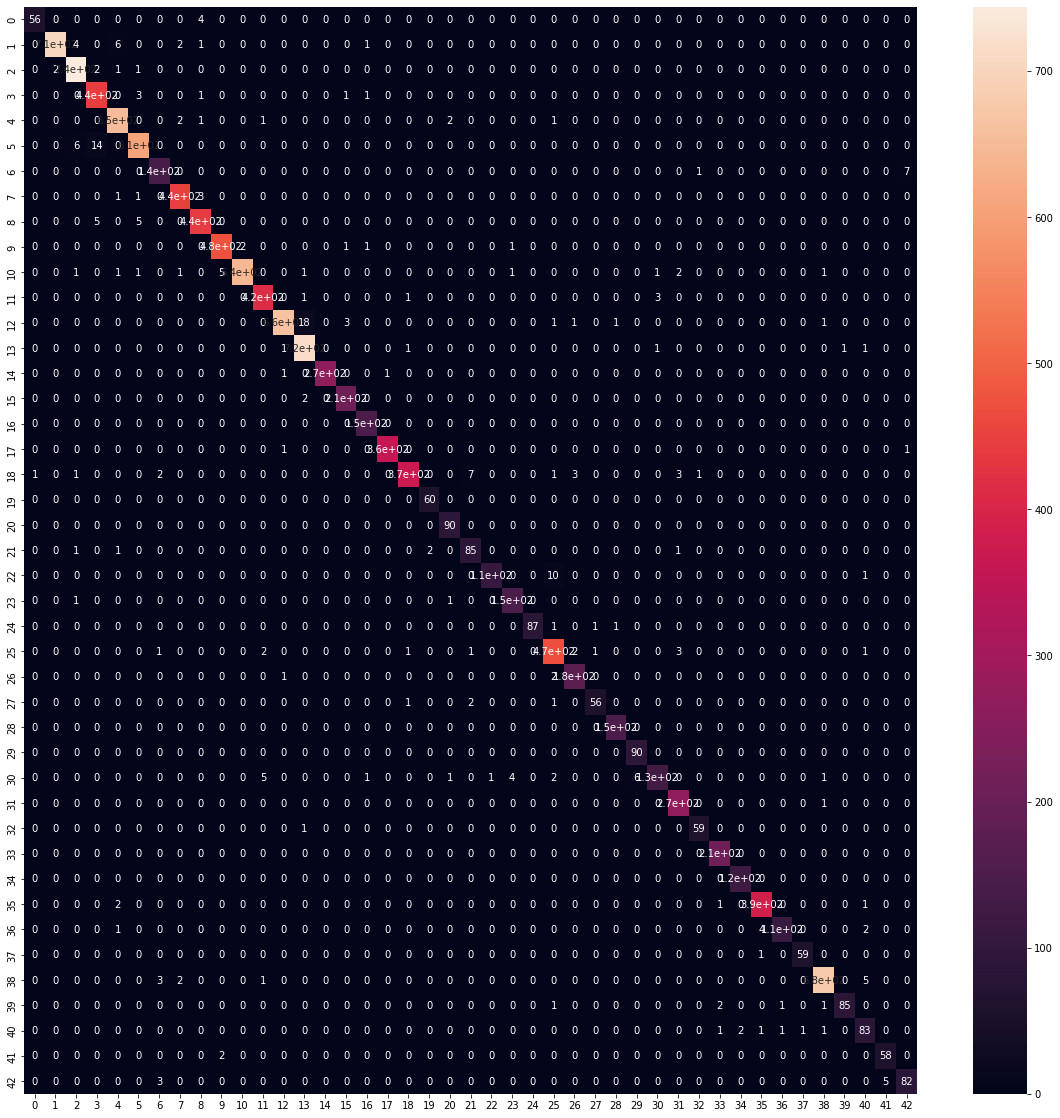

In [48]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Classification report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       1.00      0.98      0.99       720
           2       0.98      0.99      0.99       750
           3       0.95      0.99      0.97       450
           4       0.98      0.99      0.98       660
           5       0.98      0.97      0.98       630
           6       0.94      0.95      0.94       150
           7       0.98      0.99      0.99       450
           8       0.98      0.98      0.98       450
           9       0.99      0.99      0.99       480
          10       1.00      0.98      0.99       660
          11       0.98      0.99      0.98       420
          12       0.99      0.96      0.98       690
          13       0.97      0.99      0.98       720
          14       1.00      0.99      1.00       270
          15       0.98      0.99      0.98       210
          16       0.97      1.00      0.99       150
          17       1.00    

## Predictions on Test Data

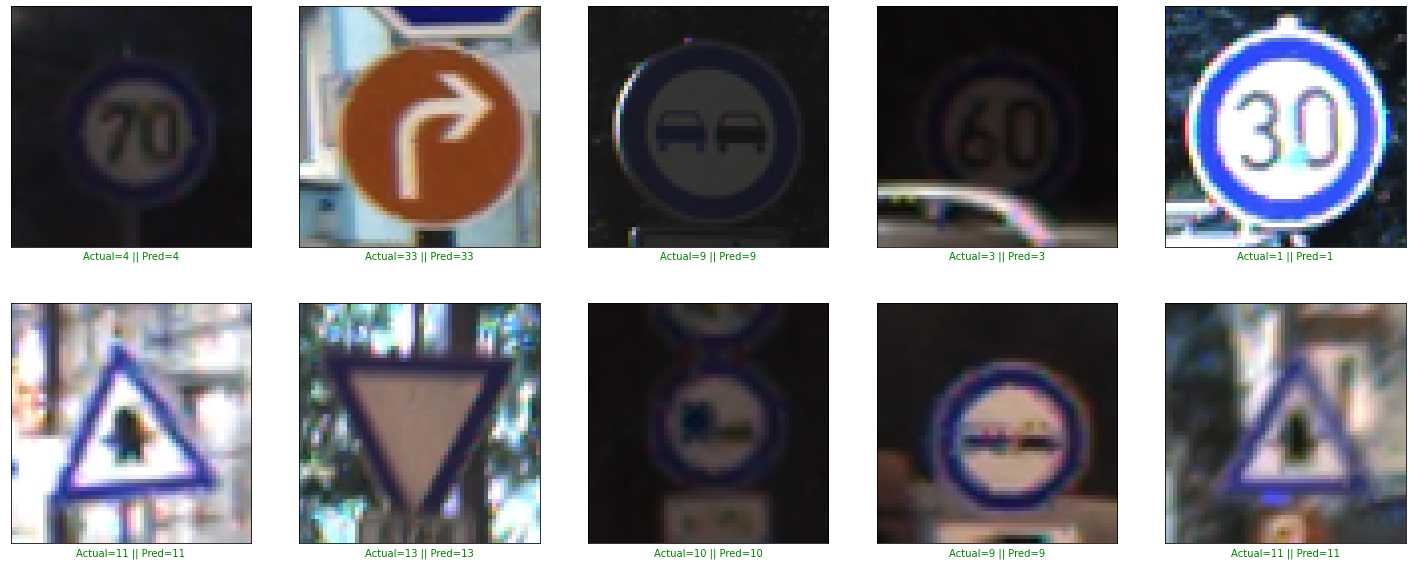

In [56]:
plt.figure(figsize = (25, 10))

start_index = 20
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()